## Exploratory Data Analysis

Loading all the data we have and merging it into one DataFrame for further analysis.

In [33]:
import pandas as pd

In [34]:
SELECTED_COUNTRIES = ["USA", "GBR", "RUS", "CHN", "IND", "DEU", "FRA", "JPN", "CHE", "ARG"]

df_tertiary = pd.read_csv("data/out/owd_education_tertiary_completion_rate.csv")
df_gpd_edu = pd.read_csv("data/out/owd_education_government_expenditure_gdp.csv")
df_nobel = pd.read_csv("data/out/nobel_laureates.csv")
df_patents = pd.read_csv("data/out/wipo_patents.csv")
df_clio = pd.read_csv("data/out/all_clio_data.csv")

# df_clio = df_clio.loc[:, ~df_clio.columns.str.contains('^Unnamed')]

merged_df = pd.merge(df_tertiary, df_gpd_edu, on=["YEAR", "COUNTRYCODE"], how="outer")
merged_df = pd.merge(merged_df, df_nobel, on=["YEAR", "COUNTRYCODE"], how="outer")
# merged_df = pd.merge(merged_df, df_patents, on=["YEAR", "COUNTRYCODE"], how="outer")
merged_df = pd.merge(merged_df, df_clio, on=["YEAR", "COUNTRYCODE"], how="outer")

# merged_df.fillna(0, inplace=True)
merged_df


duplicates = merged_df.groupby(['YEAR', 'COUNTRYCODE']).size().reset_index(name='count')
duplicates = duplicates[duplicates['count'] > 1]
print(duplicates)

merged_df[(merged_df['YEAR'] == 1884) & (merged_df['COUNTRYCODE'] == 'BEL')]



       YEAR COUNTRYCODE  count
76326  1901         DEU      2
76597  1902         NLD      2
76719  1903         FRA      3
76912  1904         GBR      2
77090  1905         DEU      3
...     ...         ...    ...
99612  2022         FRA      3
99714  2022         USA      3
99755  2023         FRA      6
99765  2023         HUN      2
99843  2024         USA      3

[165 rows x 3 columns]


,COUNTRYCODE,YEAR,TERTIARYCOMPLETIONRATE,EDUCATIONGDPSHARE,NOBELLAUREATES,ARMEDCONFLICTSINTERNAL,ARMEDCONFLICTSINTERNATIONAL,AVERAGEYEARSOFEDUCATION,BOOKTITLESPERCAPITA,COMPETITIVENESSOFEXECUTIVERECRUITMENTXRCOMP,...,POLYARCHY,REGULATIONOFCHIEFEXECUTIVERECRUITMENTXRREG,REGULATIONOFPARTICIPATIONPARREG,SOCIALSPENDING,UNIFIEDDEMOCRACYSCORESUDS,URBANIZATIONRATIO,WEALTHDECADALGINIS,WEALTHTOP10PERCENTSHARE,WEALTHTOTAL,WEALTHYEARLYGINIS
73022,BEL,1884,NaN,NaN,NaN,0.0,0.0,NaN,258.6533,2.0,...,0.74,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


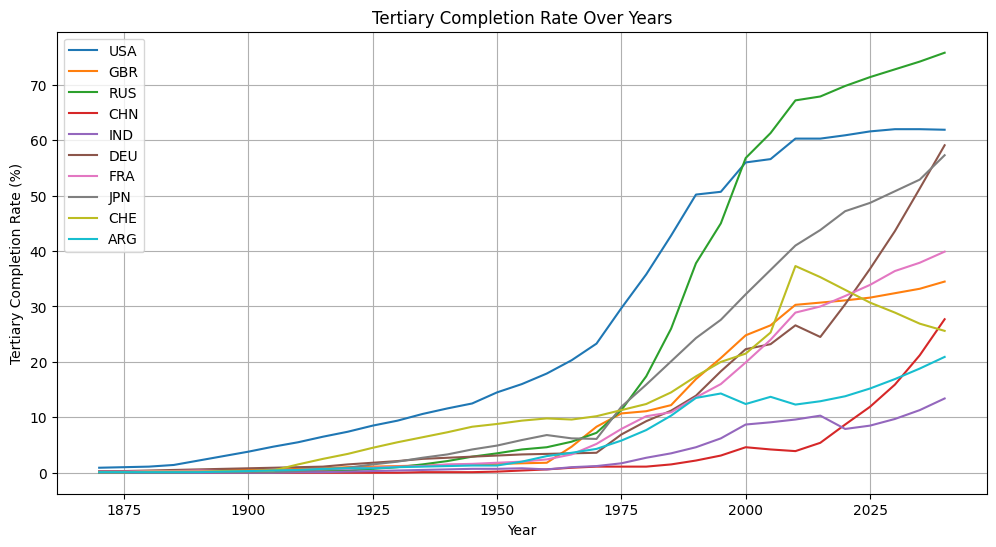

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for country in SELECTED_COUNTRIES:
    country_data = df_tertiary[df_tertiary['COUNTRYCODE'] == country]
    plt.plot(country_data['YEAR'], country_data['TERTIARYCOMPLETIONRATE'], label=country)

plt.title('Tertiary Completion Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Tertiary Completion Rate (%)')
plt.legend()
plt.grid()
plt.show()


<Figure size 1200x600 with 0 Axes>

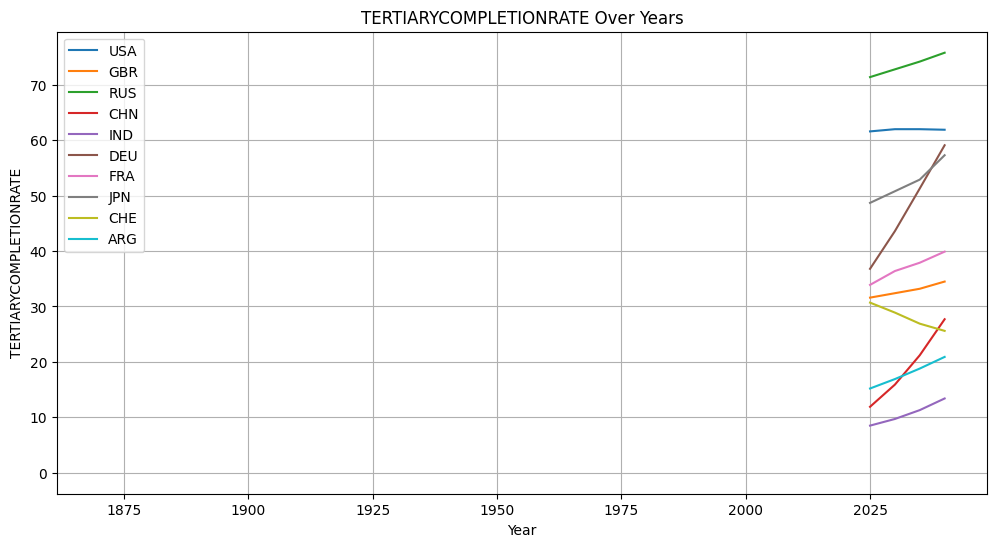

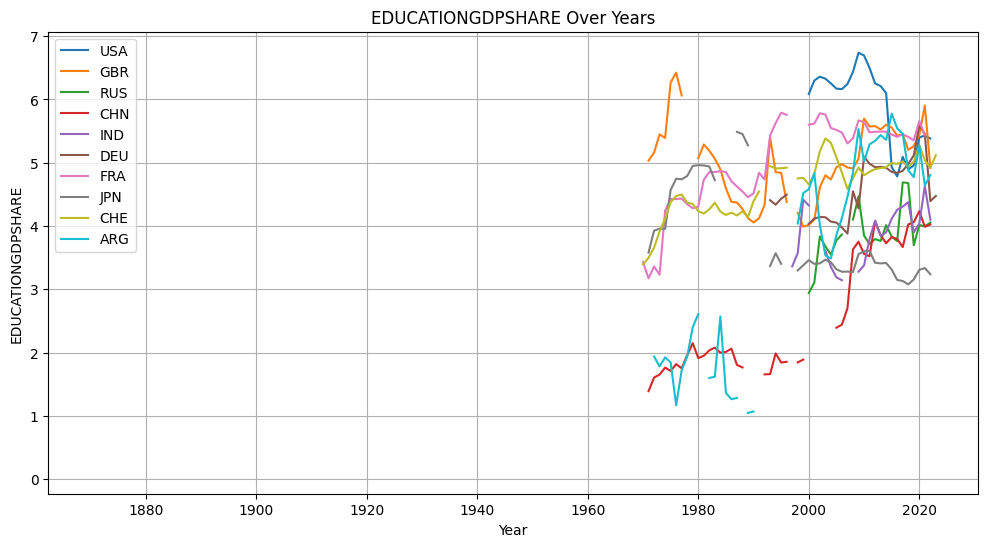

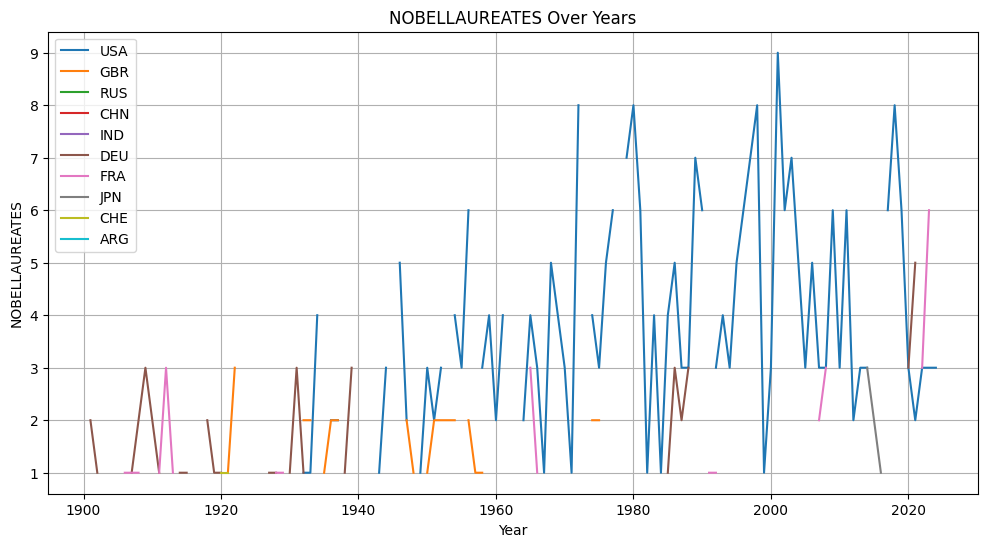

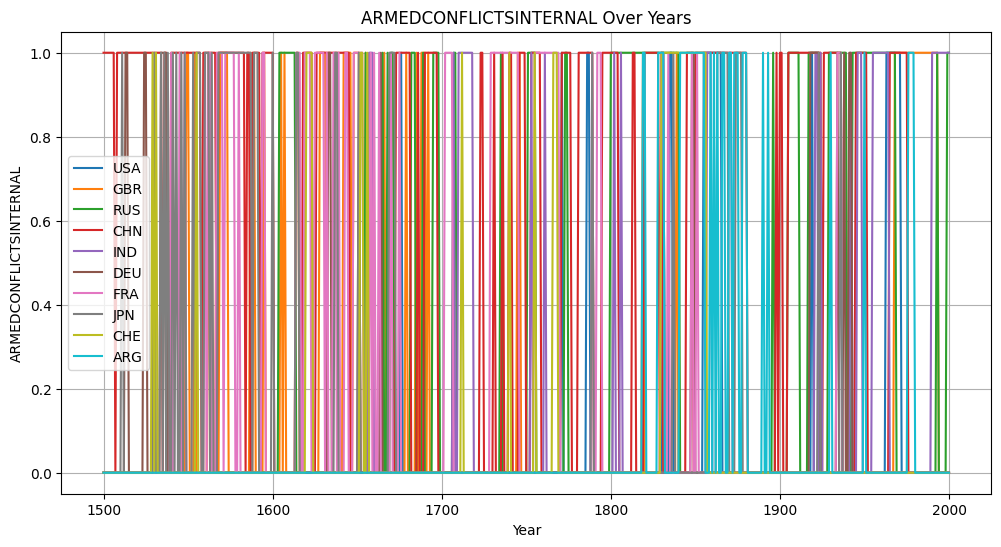

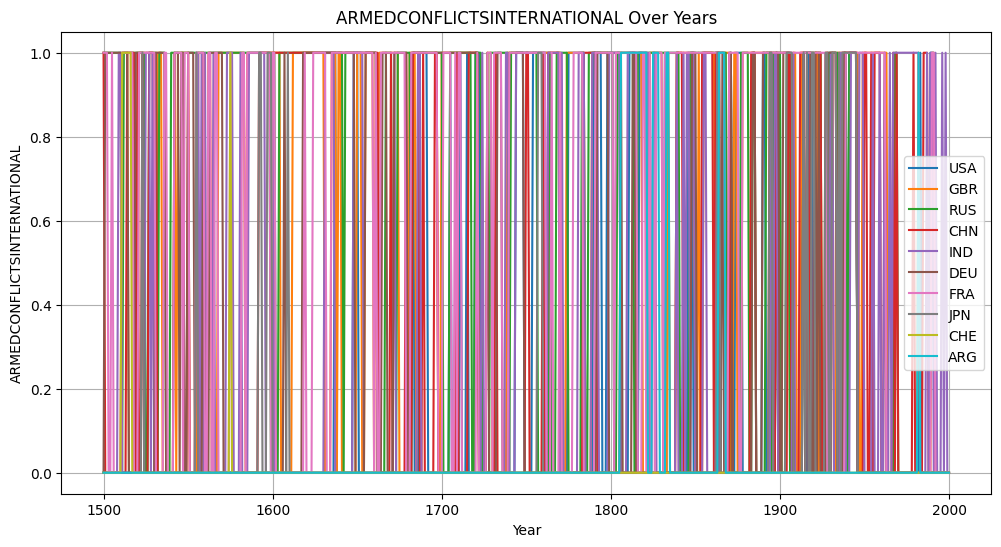

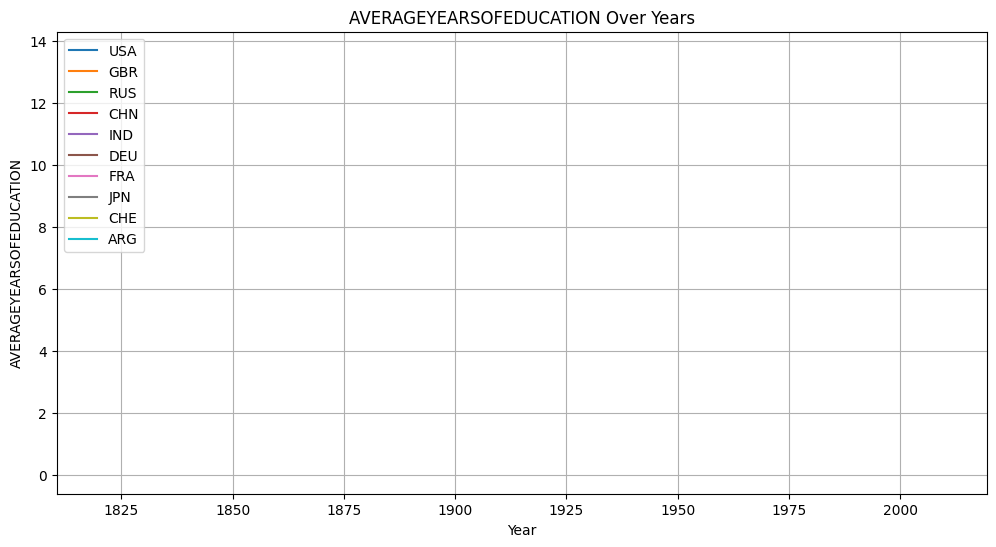

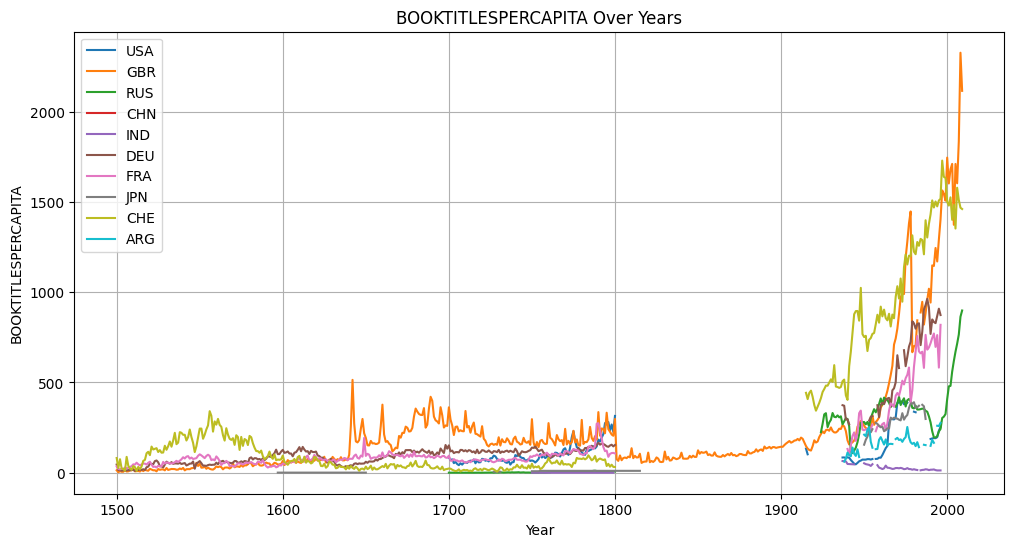

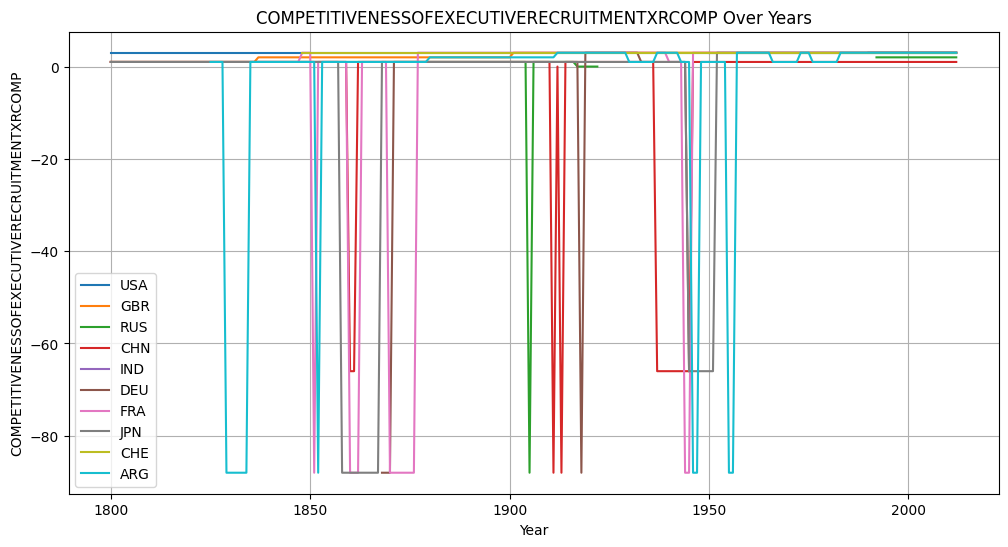

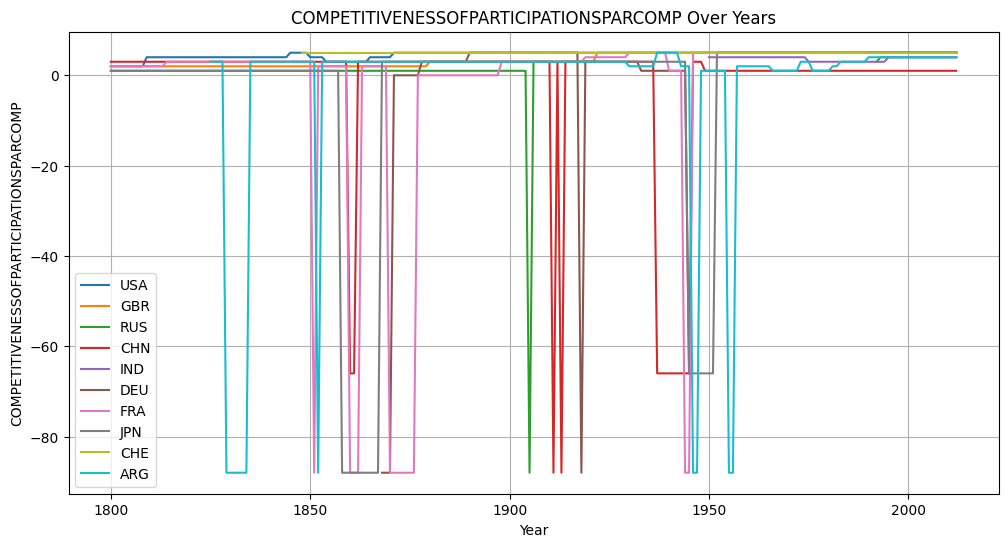

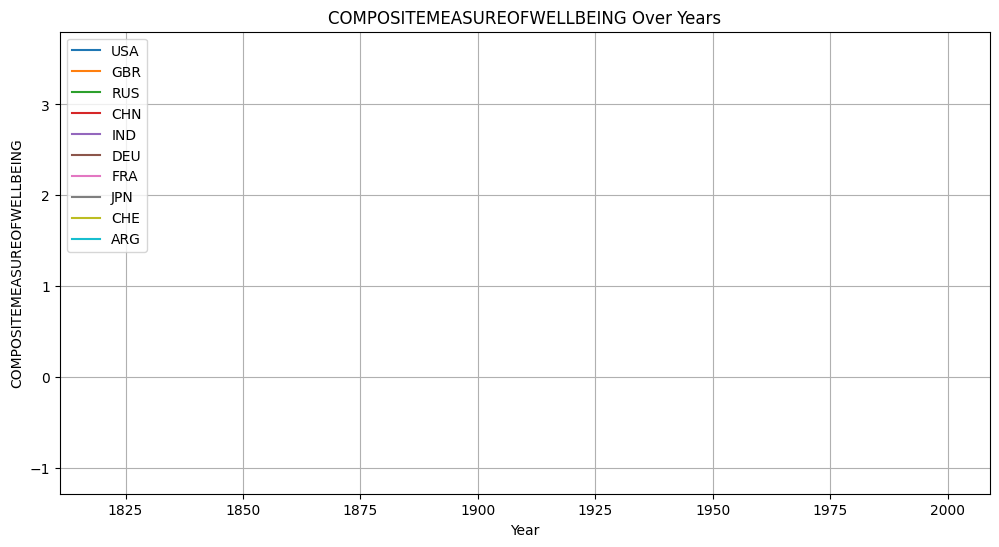

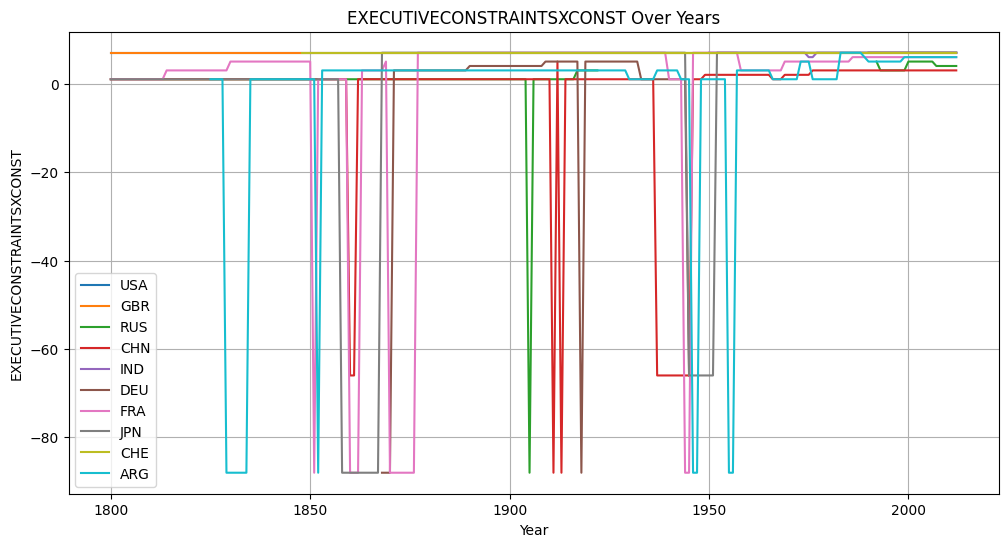

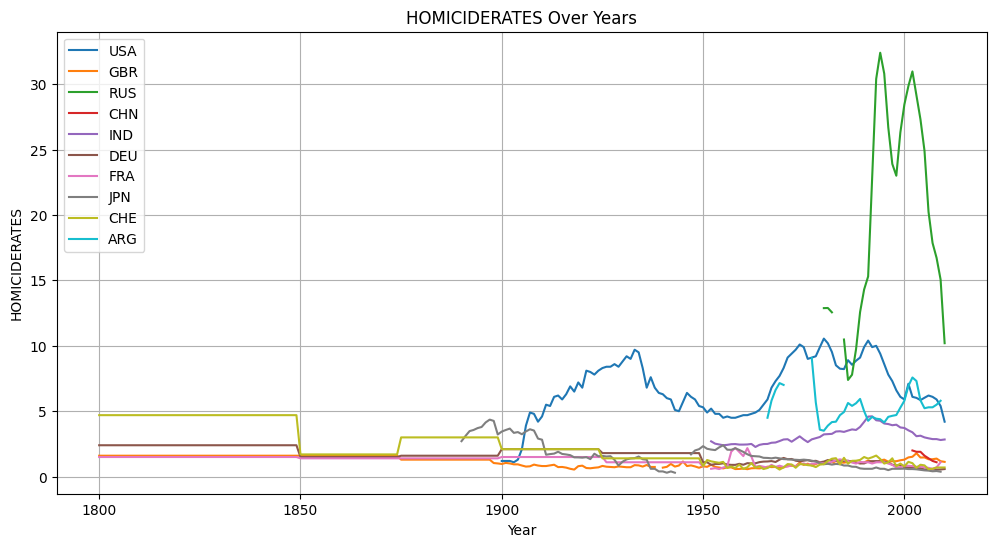

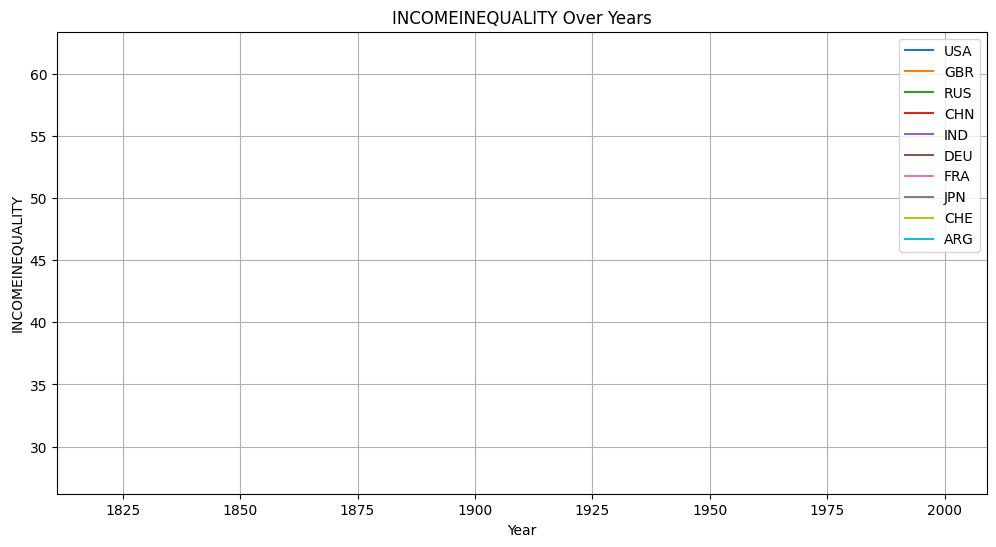

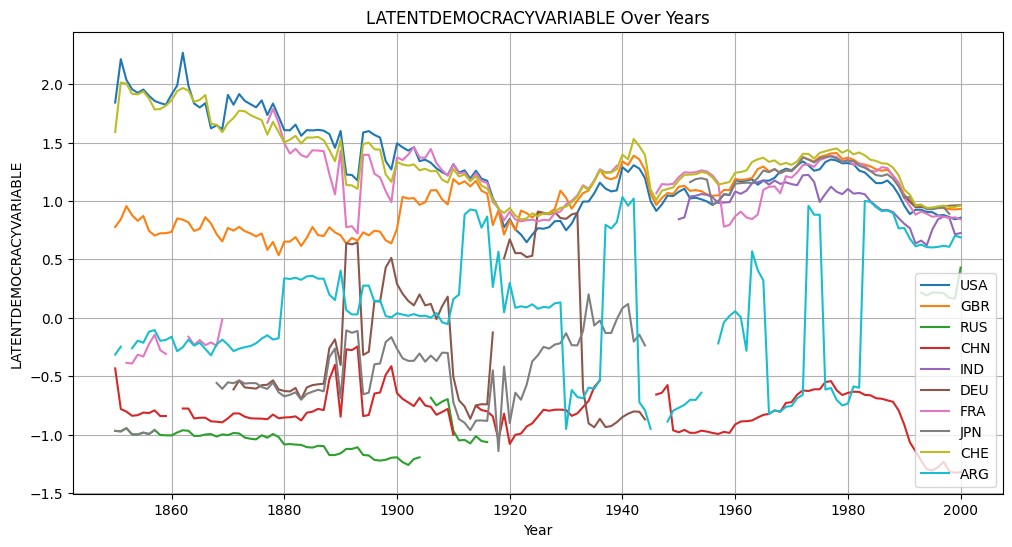

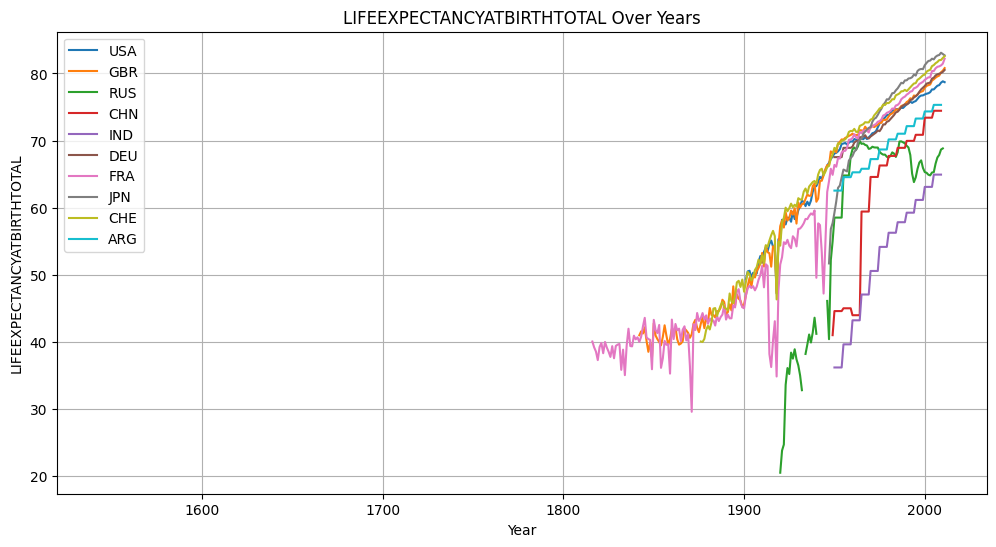

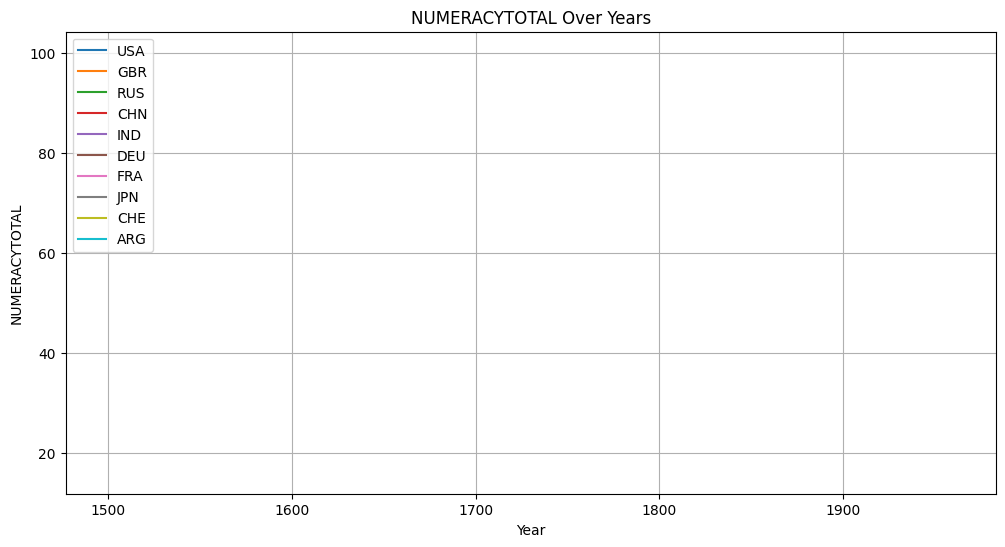

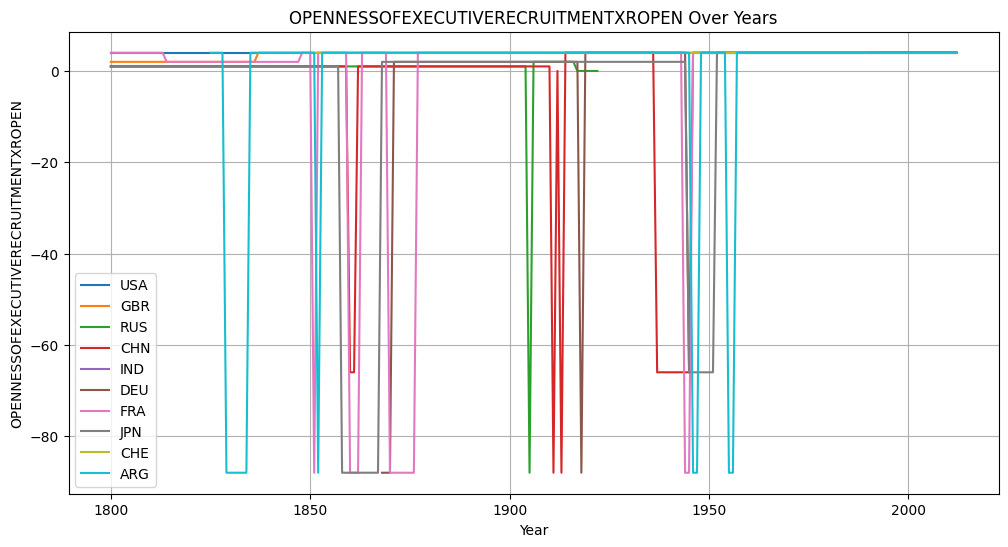

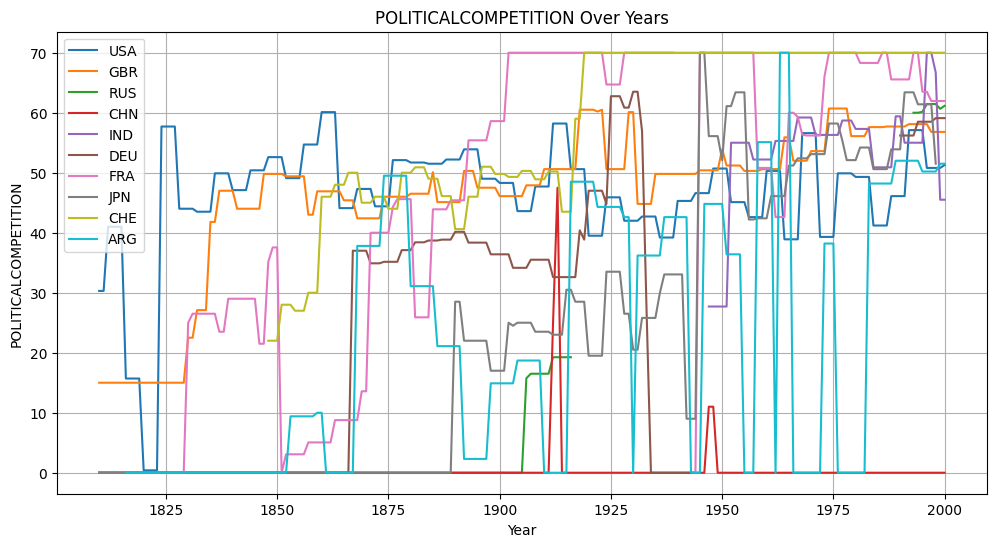

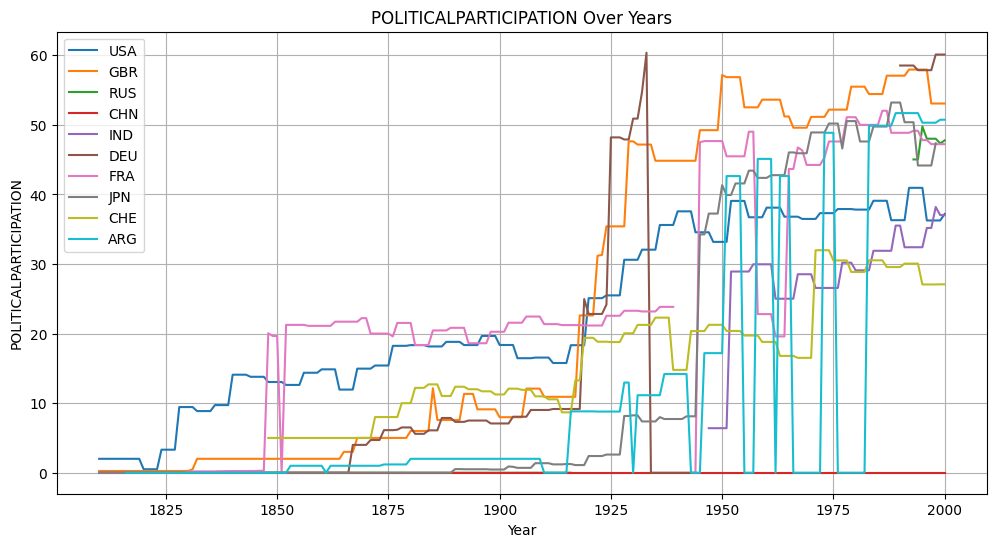

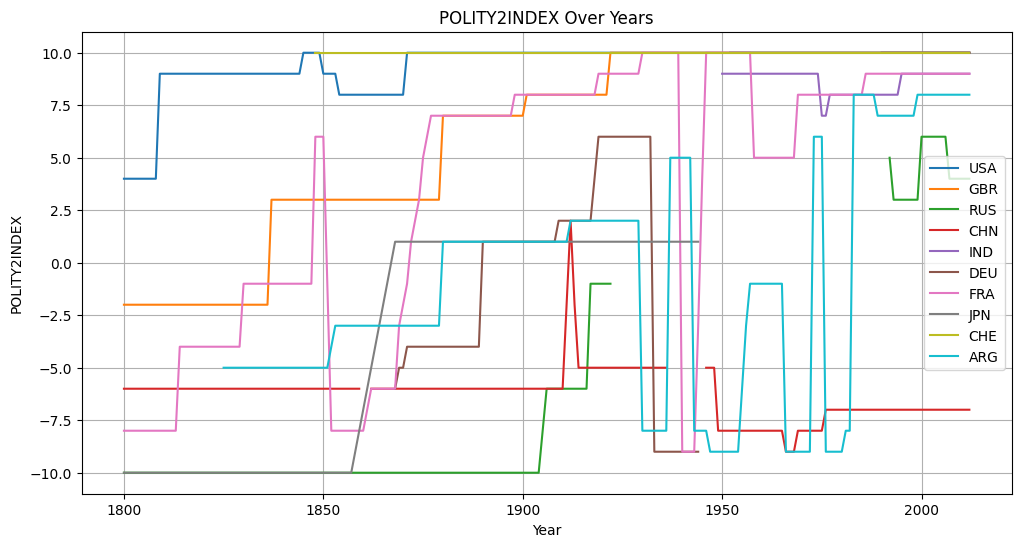

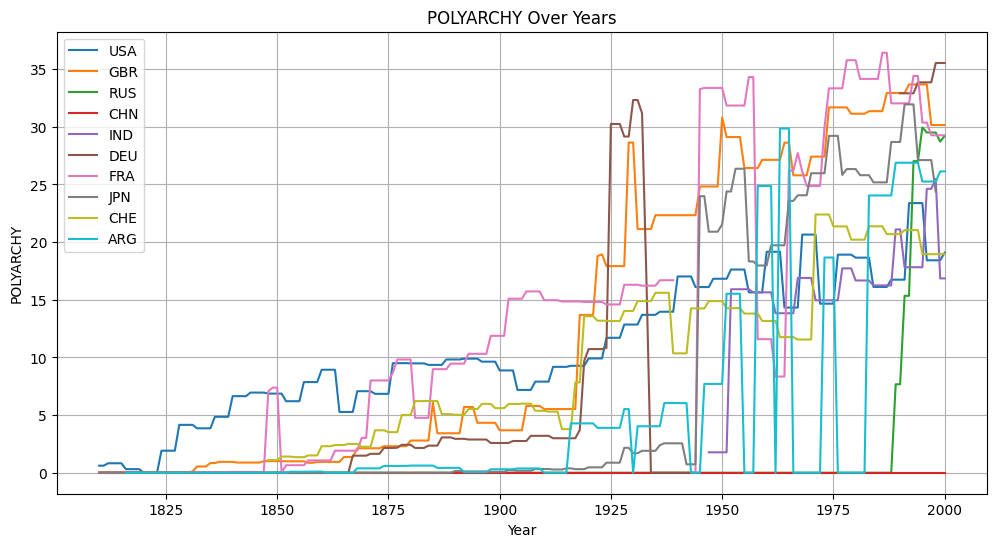

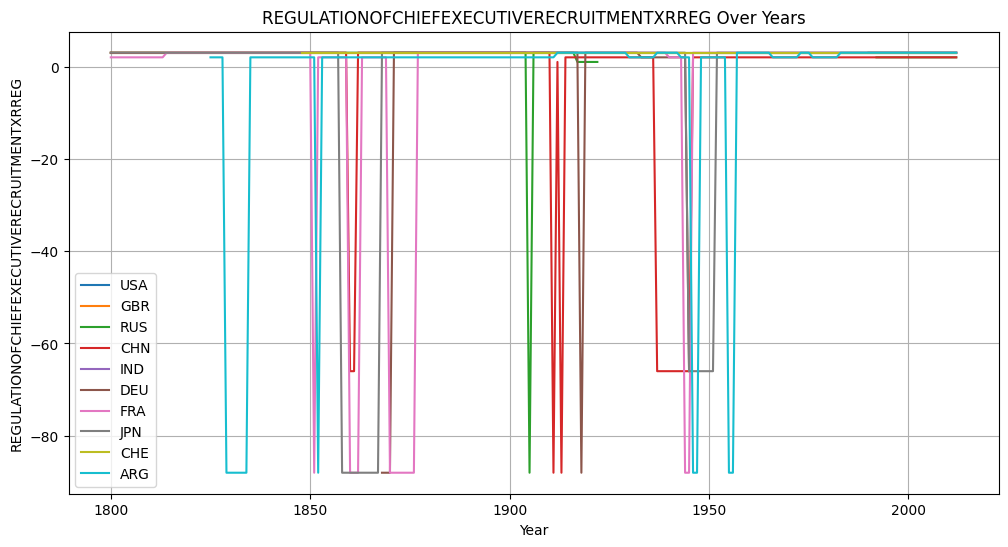

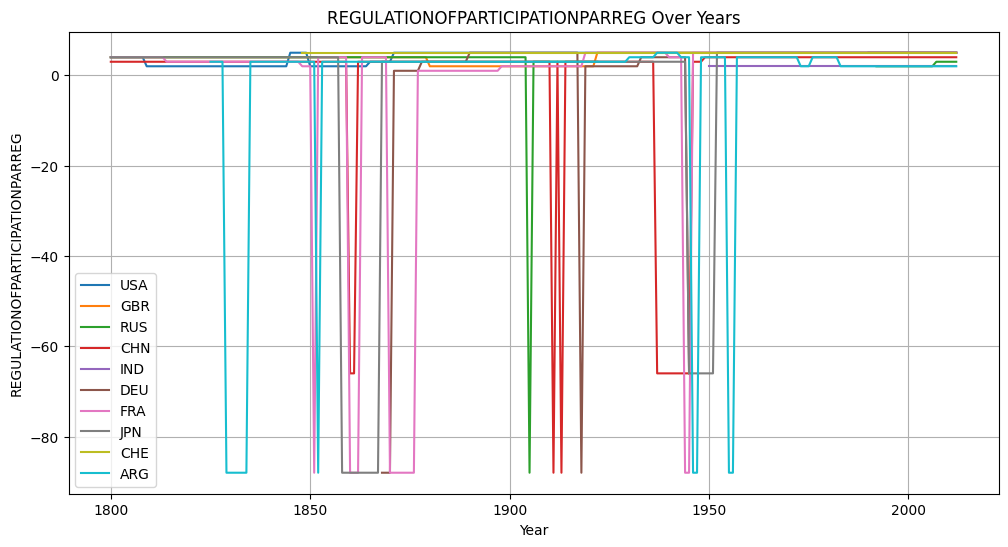

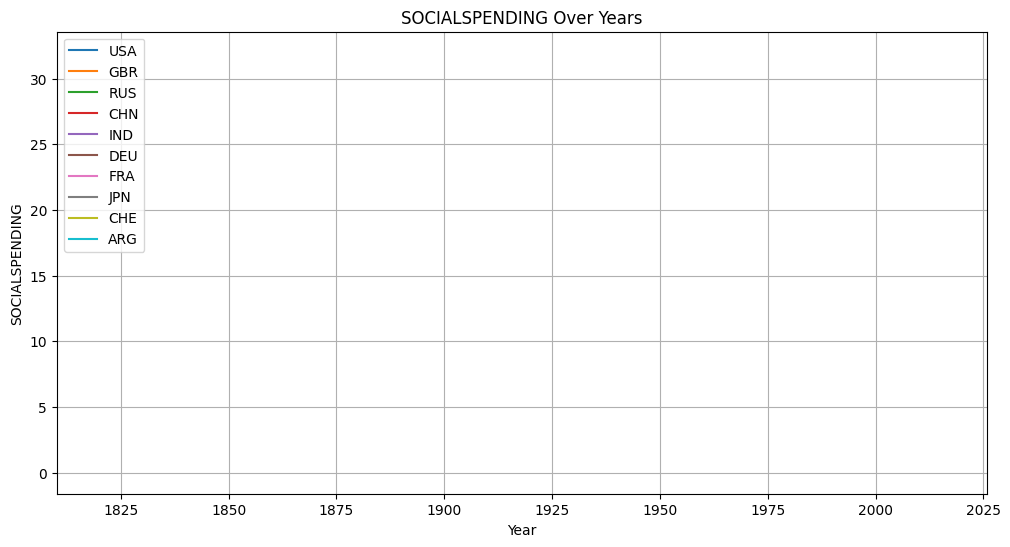

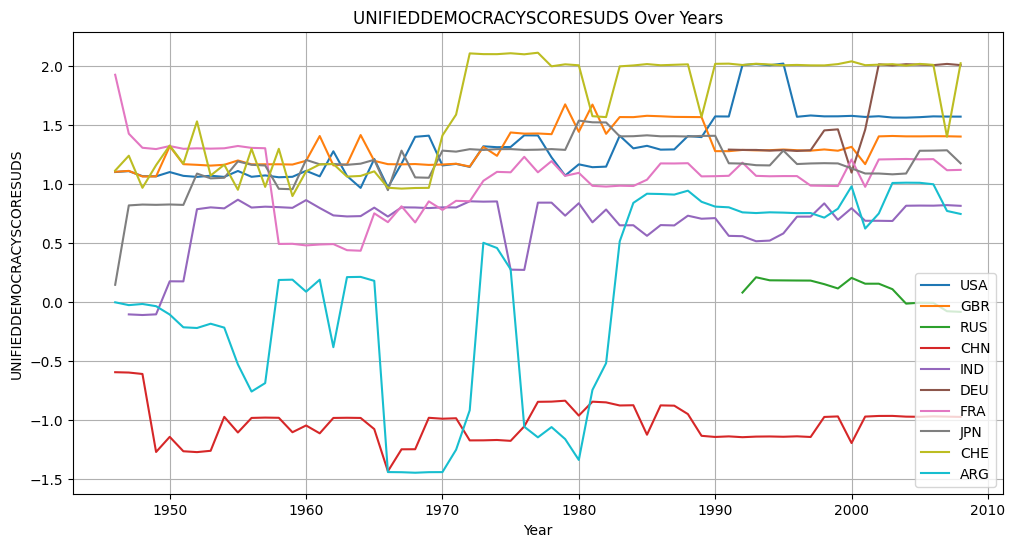

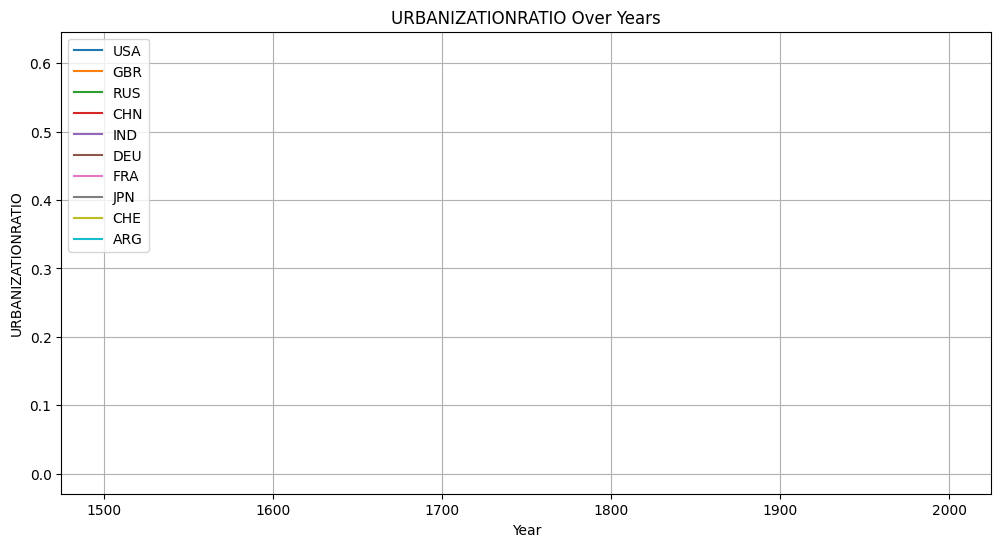

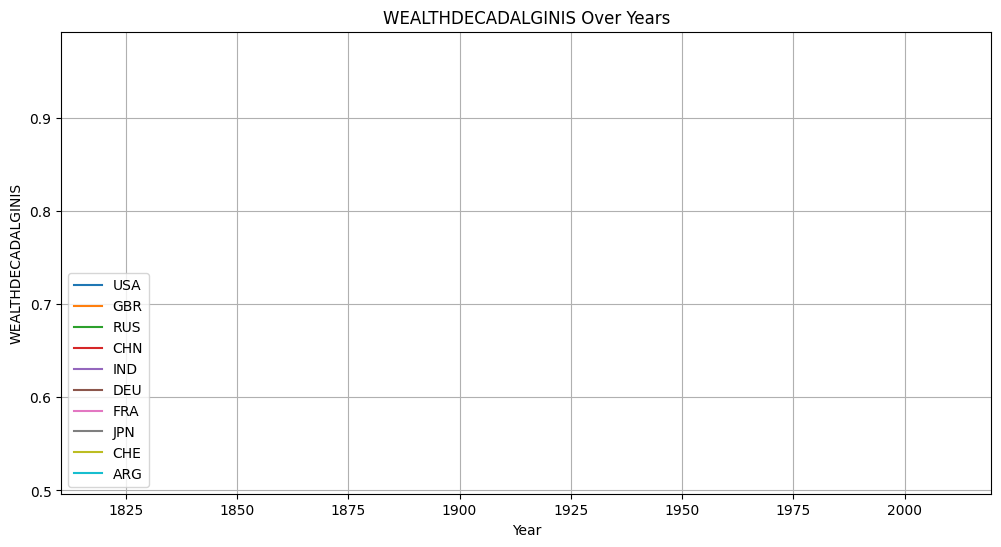

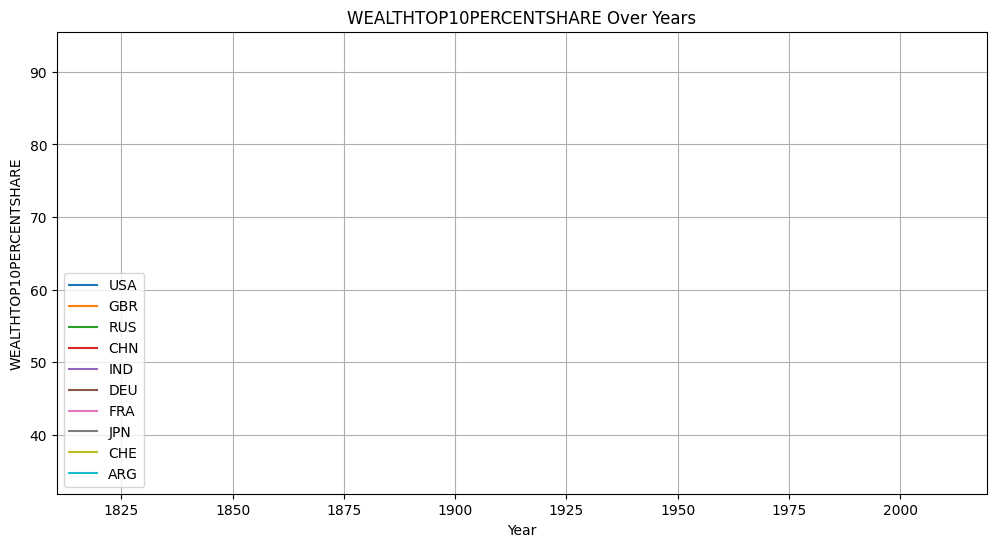

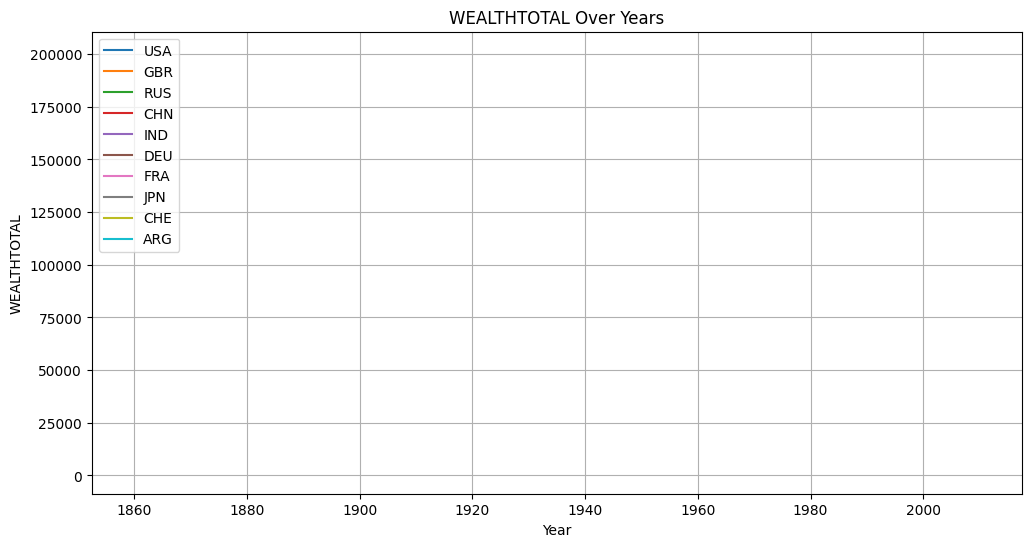

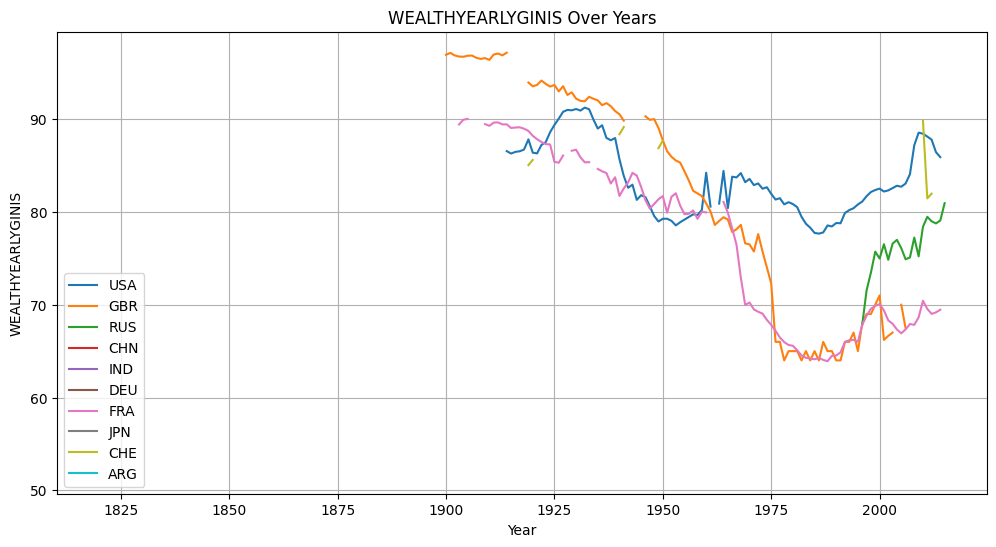

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for column in merged_df.columns:
    if column not in ['YEAR', 'COUNTRYCODE']:  # Exclude non-numeric columns
        plt.figure(figsize=(12, 6))
        for country in SELECTED_COUNTRIES:
            country_data = merged_df[merged_df['COUNTRYCODE'] == country]
            plt.plot(country_data['YEAR'], country_data[column], label=country)
        plt.title(f'{column} Over Years')
        plt.xlabel('Year')
        plt.ylabel(column)
        plt.legend()
        plt.grid()
        plt.show()
